<h3 style='text-align: center;'>Oasis Infobyte</h3>
<h1 align="center">Car Price Prediction using Linear Regression</h1> 
<div style="text-align: right">Created<br>
-- by Ruhit Debnath<br>
-- for Oasis Infobyte<br>
-- May-June, 2023</div>


In [27]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [28]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
cars.shape # (dong, cot)

(205, 26)

In [30]:

cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [31]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Cleaning and Preparation

In [32]:
# Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Looking at the names of car manufacturers, we see:**
+ In the CompanyName column, some automaker names are misspelled. 
+ It should be adjusted as follows: 
    + maxda = mazda 
    + Nissan = nissan 
    + porsche = porcshce 
    + toyota = toyota 
    + vokswagen = volkswagen = vw

In [34]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [35]:

cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [36]:

cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##  Data Visualization


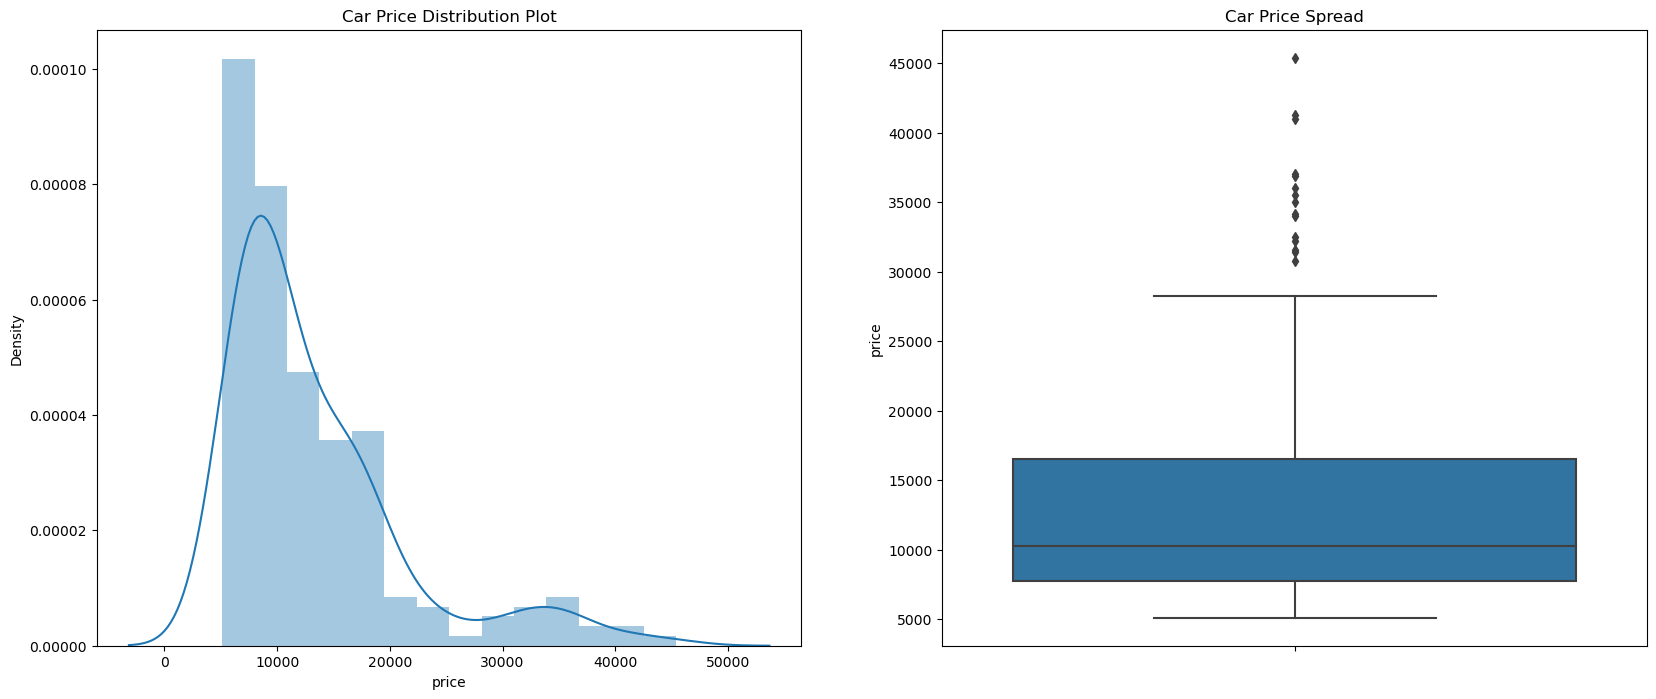

In [37]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [38]:

print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64



**Some conclusions are as follows:** 
+ The histogram appears to be skewed to the right, which means that most of the prices in the data set are in the low (Below 15000). 
+ There is a significant difference between the mean and the mean of the price distribution. 
+ The data points are far from the mean, which indicates a high variance in car prices. (85% of the price is under 18,500, while the remaining 15% is between 18,500 and 45,400)

### Step 3.1 Visualising Categorical Data (Trực quan hóa dữ liệu phân loại)
- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

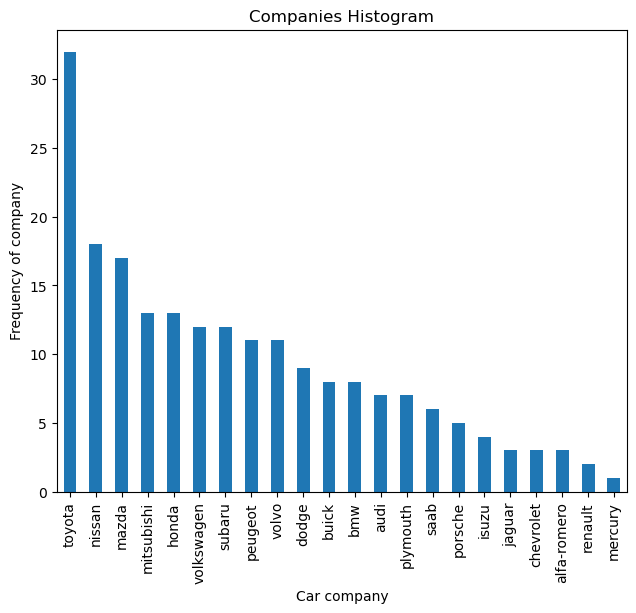

In [39]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')
plt.show()

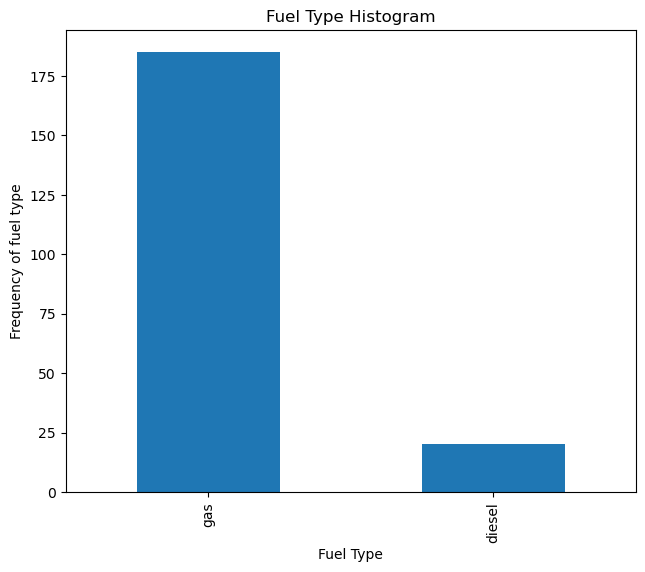

In [40]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')
plt.show()

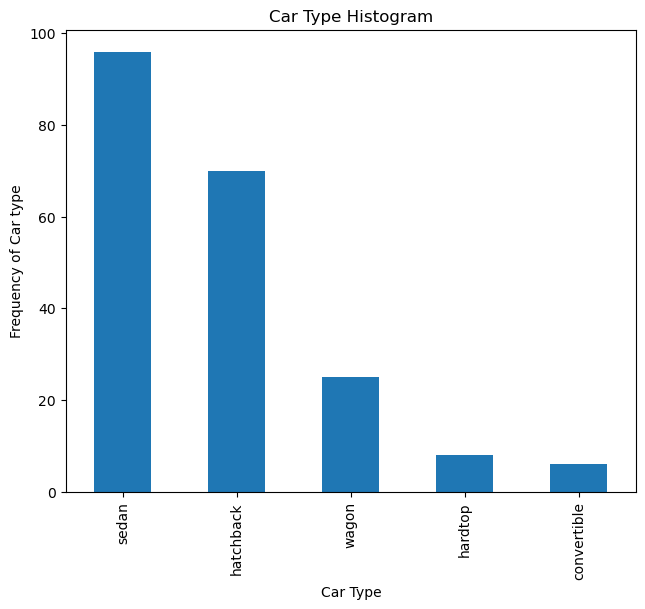

In [41]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.show()

**Conclude :** 
+ Toyota is a car brand that is preferred by consumers. 
+ More cars run on gasoline (gas) than diesel engines. 
+ sedans are the top favorites.

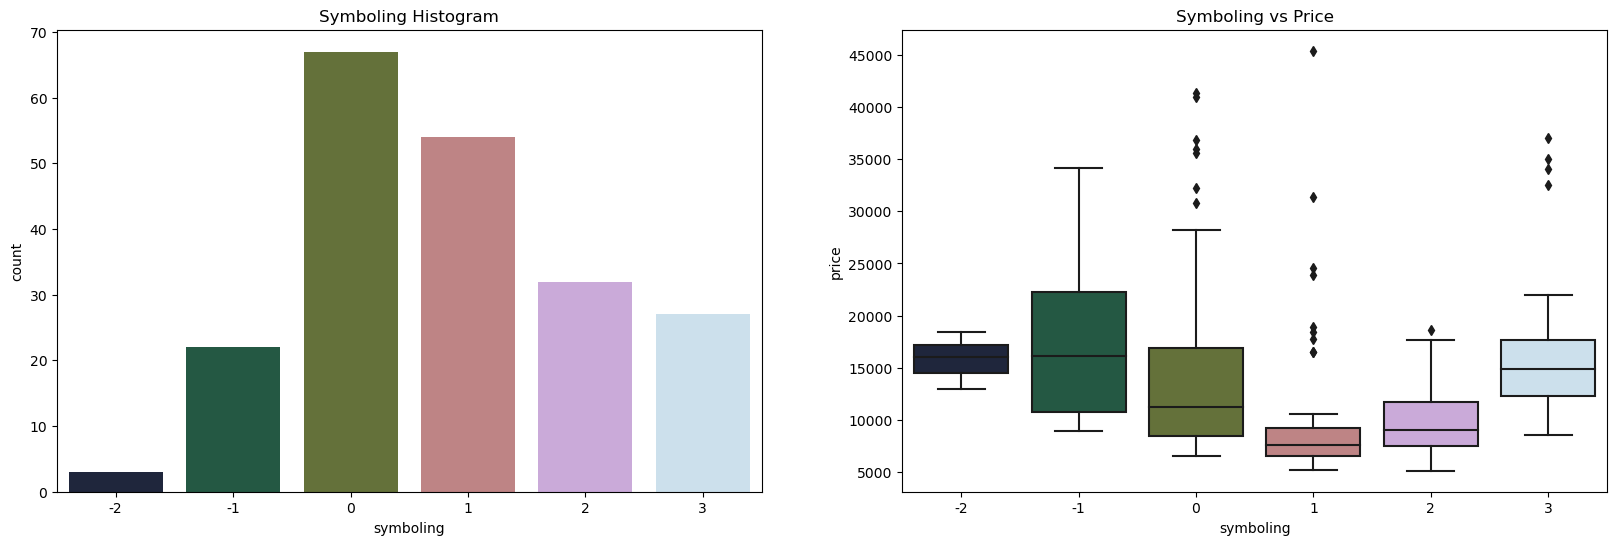

In [42]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data = cars, x = 'symboling', palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

**Conclusion:**
+ Cars marked -1 seem to have a high price tag. However, cars marked with value 3 have the same price range as value -2. 
+ There is a discount in symbol 1.

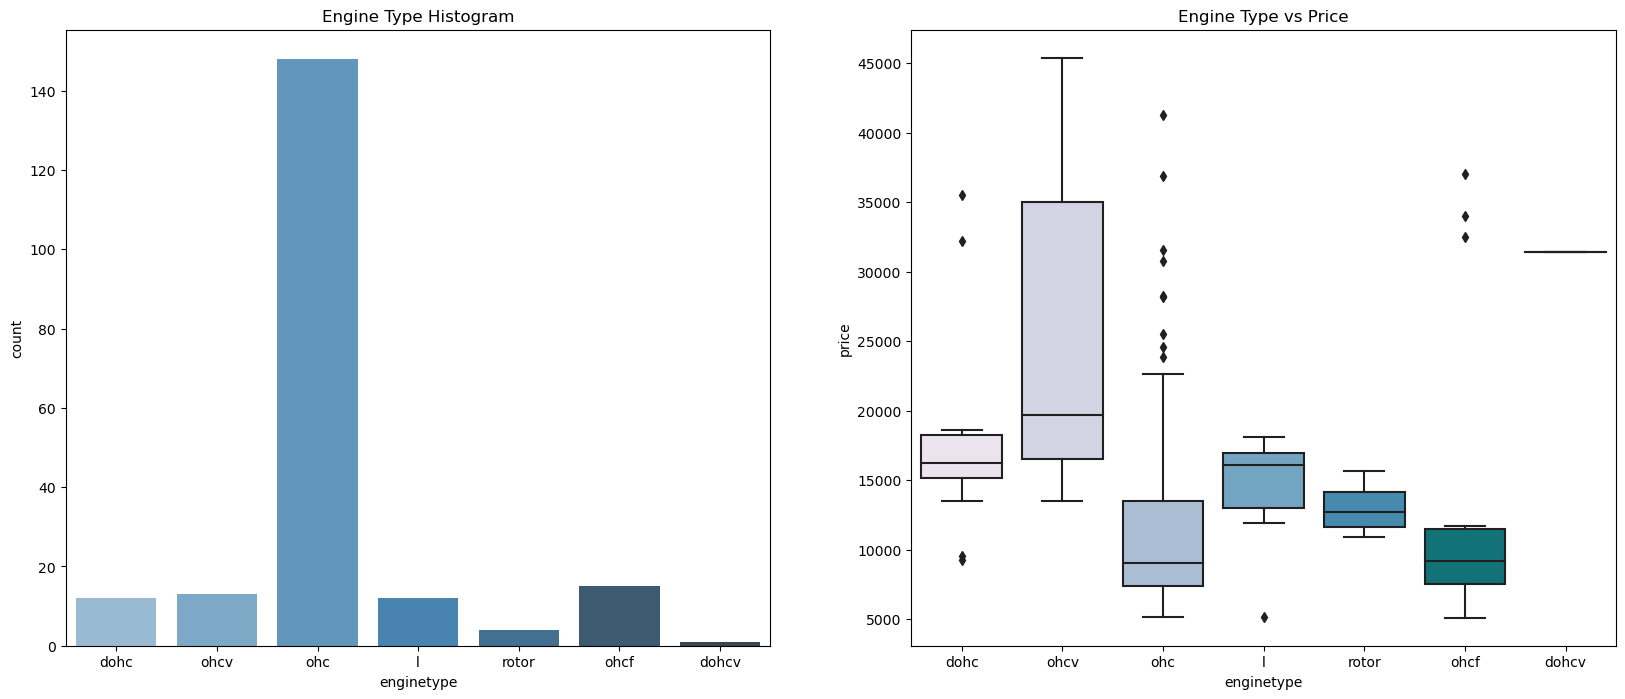

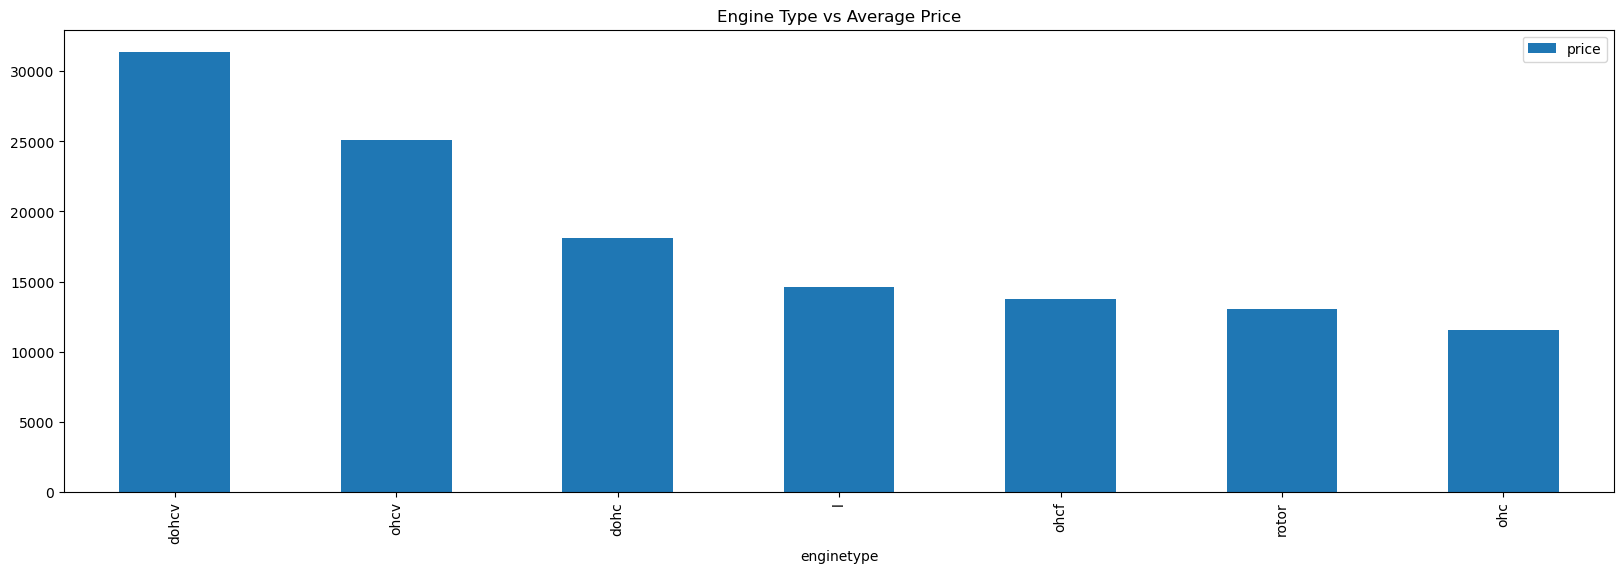

In [43]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data = cars, x = 'enginetype', palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(20,6))
plt.title('Engine Type vs Average Price')
plt.show()

**Comment:** 
+ ohc seems to be the most popular type of motor. 
+ ohcv has the highest price (While dohcv has only 1 row), ohc and ohcf have the lowest price.

<Figure size 2500x600 with 0 Axes>

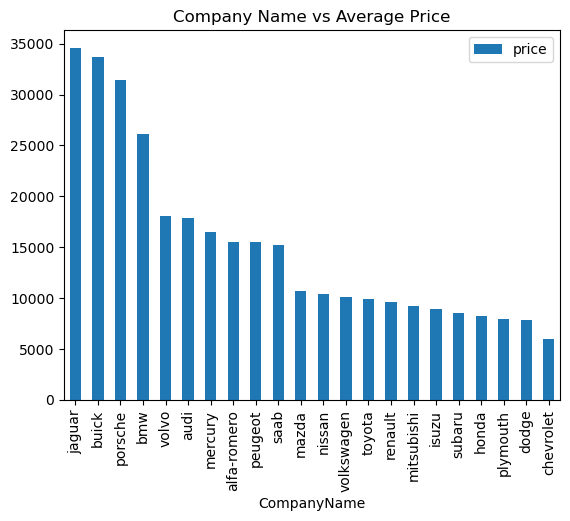

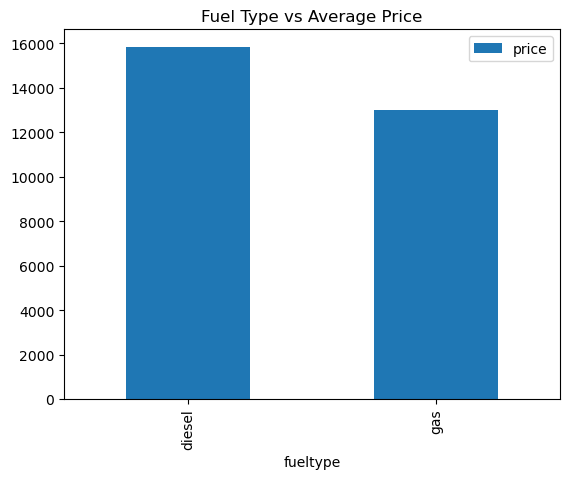

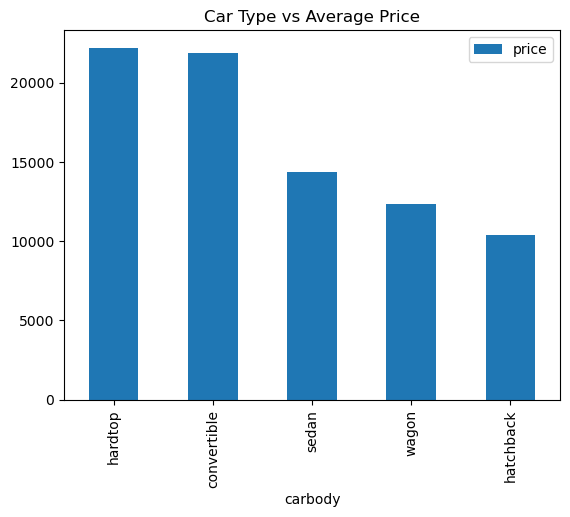

In [44]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show();

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show();

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show();

**Conclude:** 
+ Vehicles from Jaguar Company and Buick Company seem to have the highest average price. 
+ Diesel-powered cars have a higher average price than gas-powered cars. 
+ Hardtops and convertibles have a higher average price.

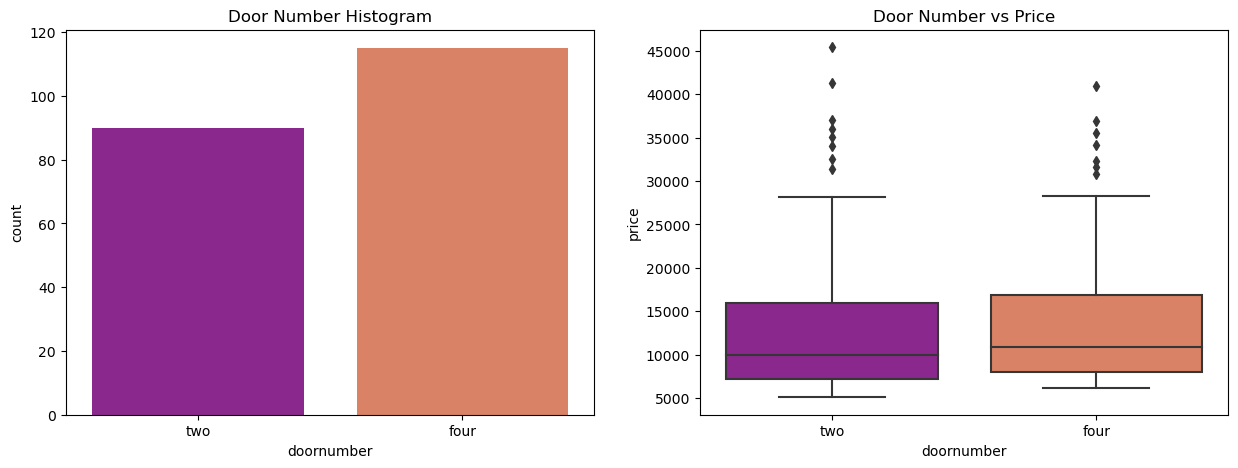

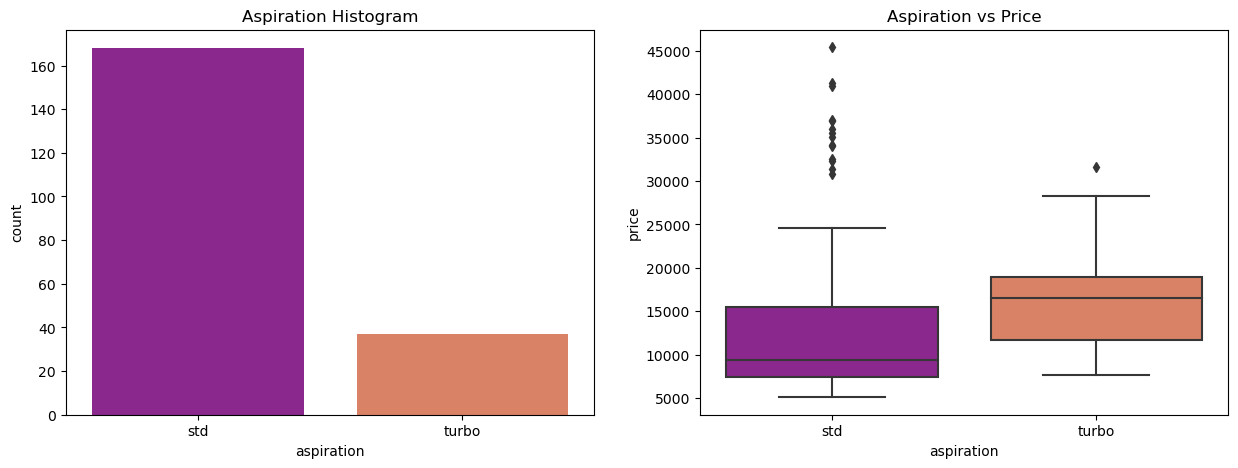

In [45]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data = cars, x = 'doornumber', palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data = cars, x = 'aspiration', palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

**Comment:** 
+ The variable **doornumber** does not affect the price much. There is no big difference between the types in it. 
+ With aspiration comes the turbo has a higher-than-standard price tag (although it does have some high value - outliers.)

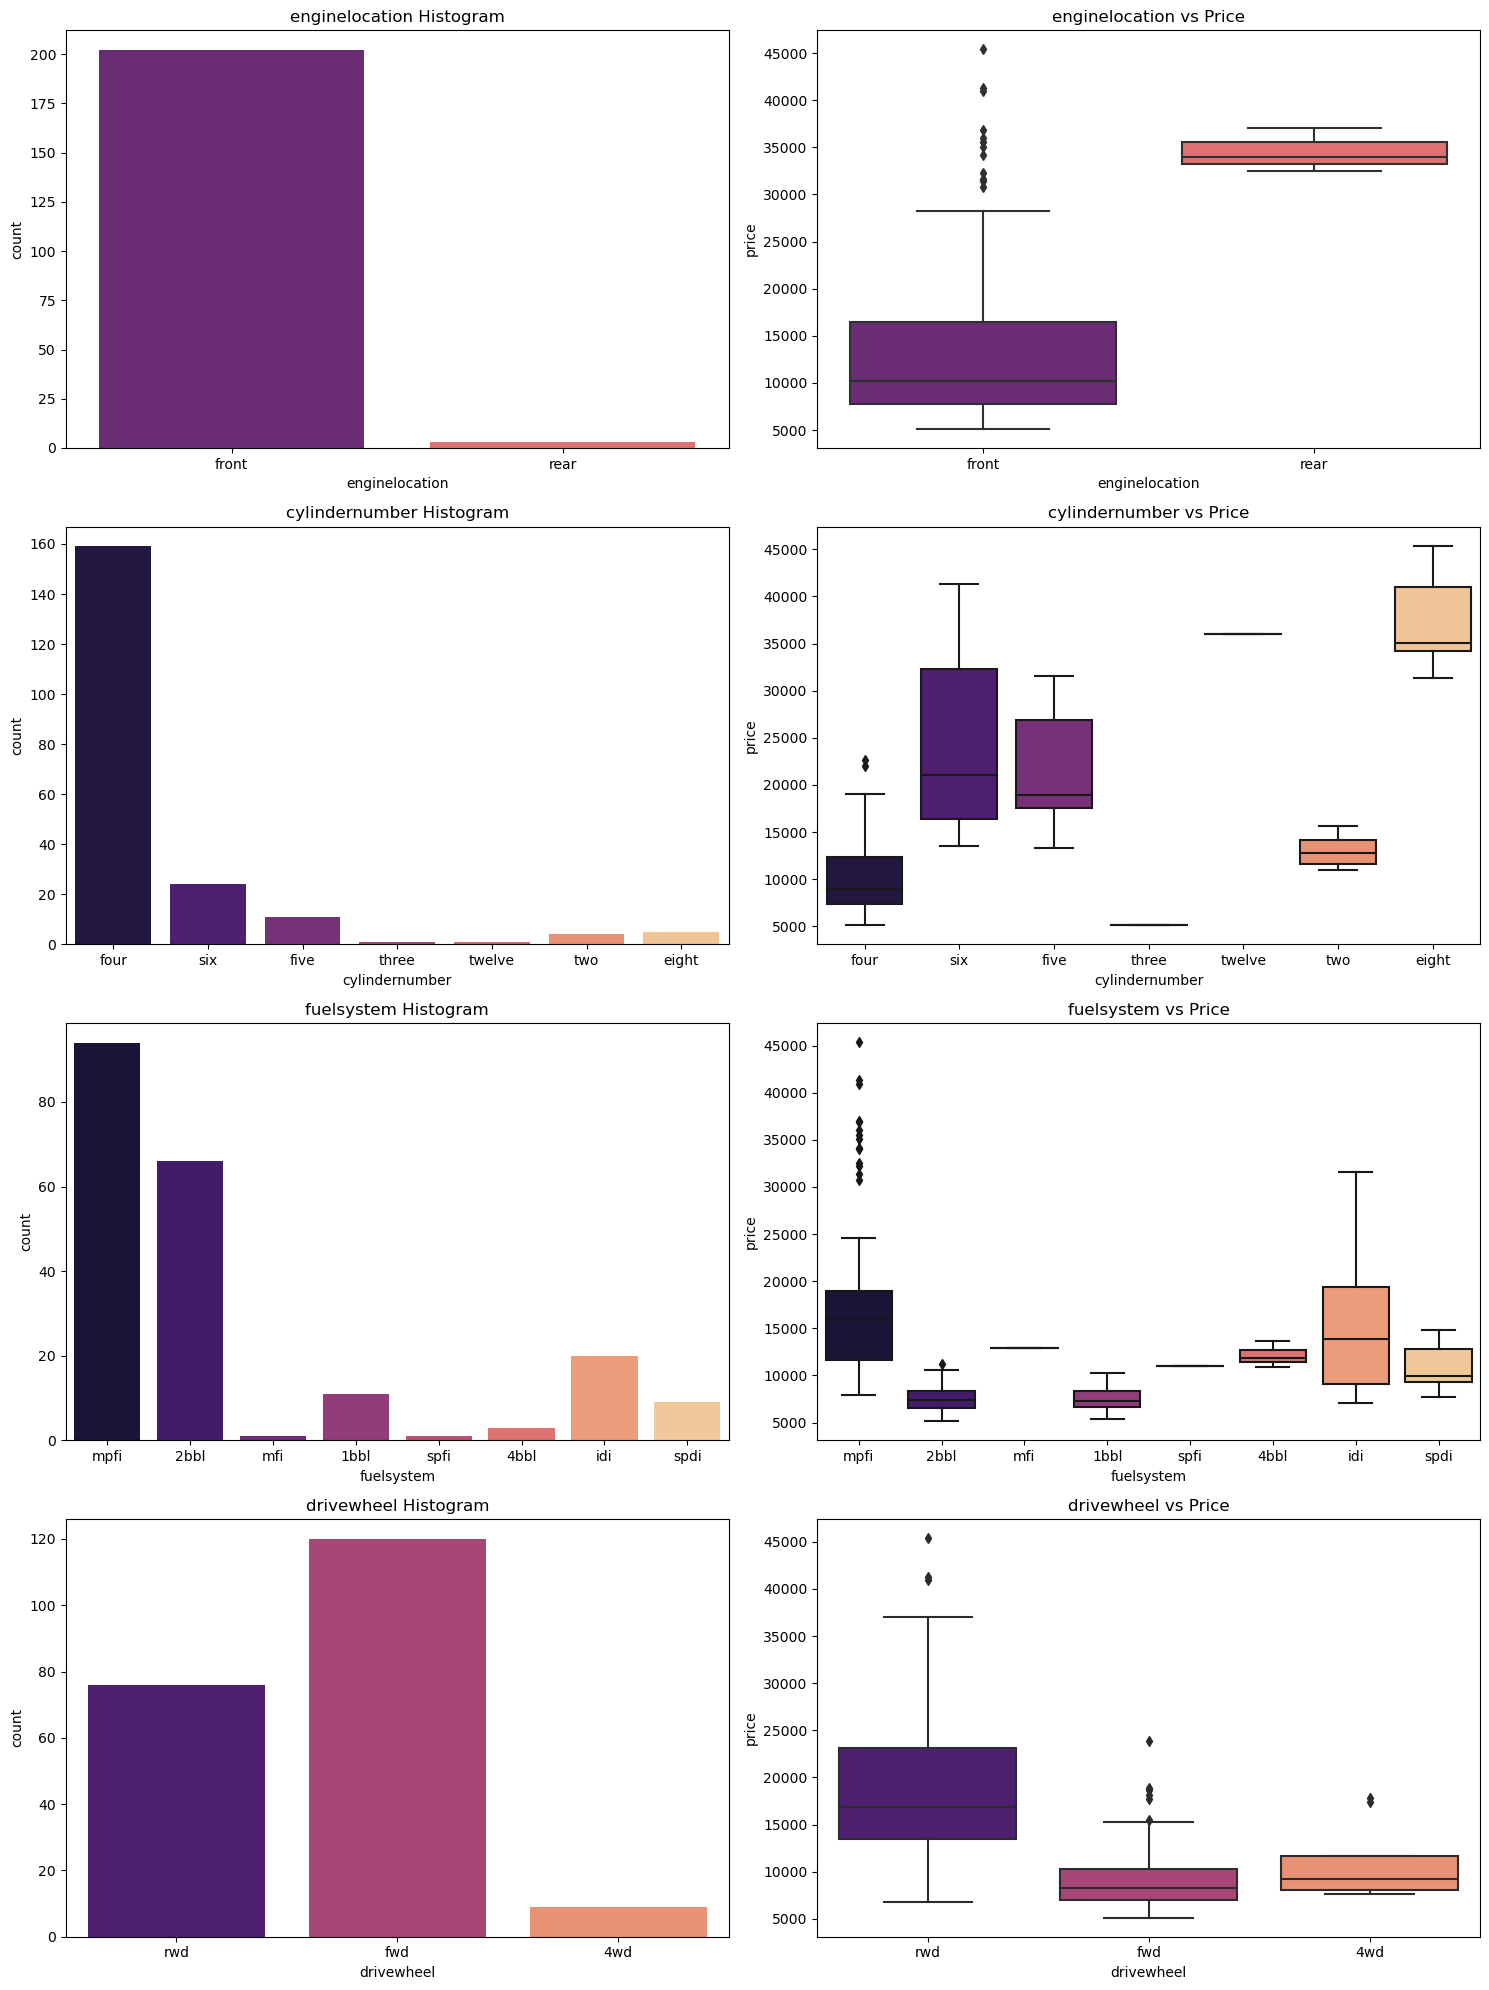

In [46]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data = cars, x=cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

**Comment:** 
+ Very few data points for enginelocation categories to infer. 
+ The most common cylinders are four, six, and five. Although eight cylinders have the highest price range. 
+ **mpfi** and **2bbl** are the most common type of fuel system. **mpfi** and **idi** have the highest rates. 
+ A very significant difference in **drivewheel** category. Most high-priced cars prefer the **rwd** drivewheel.

### Step 3.2 Visualization numerical data (Trực quan hóa dữ liệu dạng số)

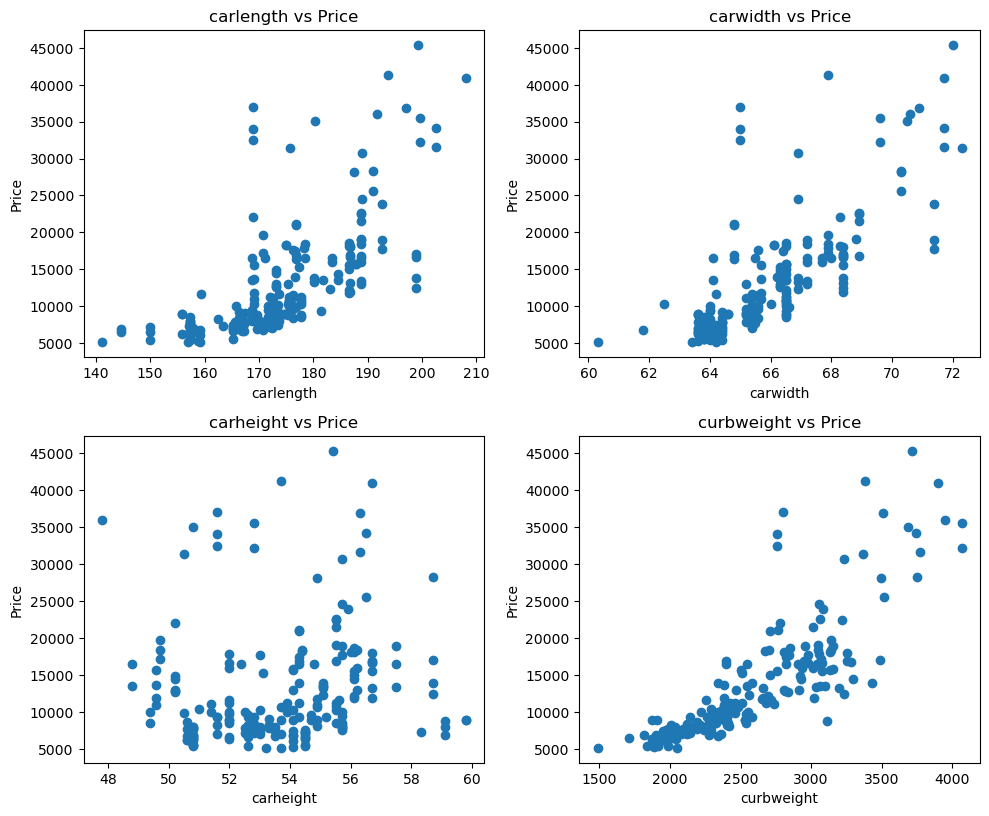

In [47]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

**Kết luận:**
+ **carwidth**, **carlength** và **curbweight** ường như có mối tương quan thuận với giá cả.
+ **carheight** không cho thấy bất kỳ xu hướng đáng kể nào với giá cả.

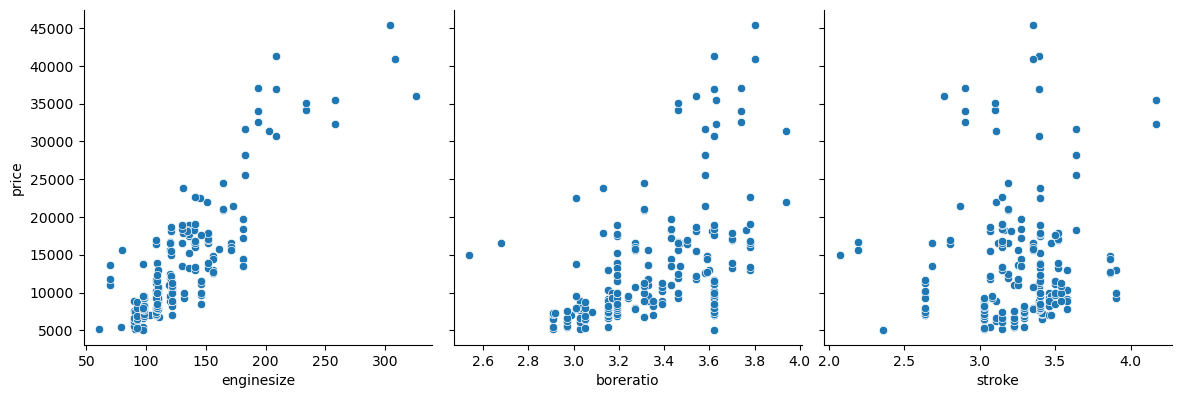

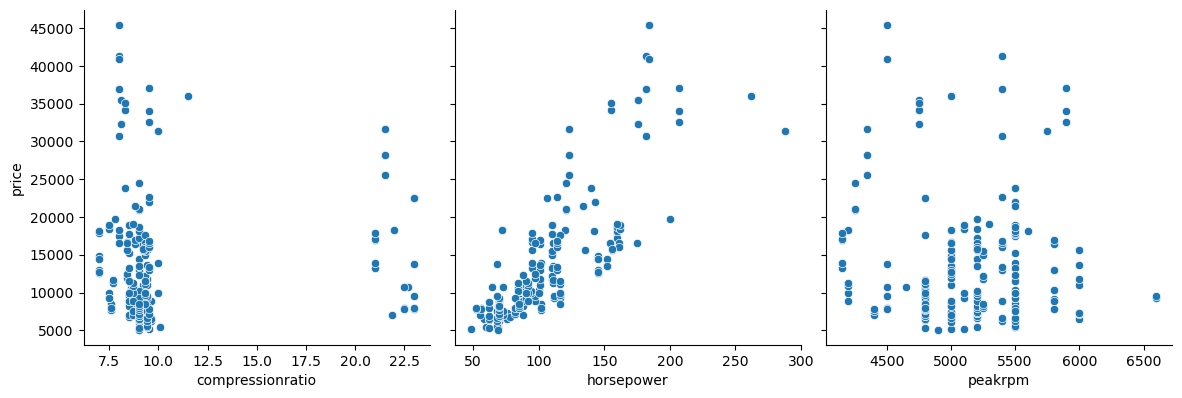

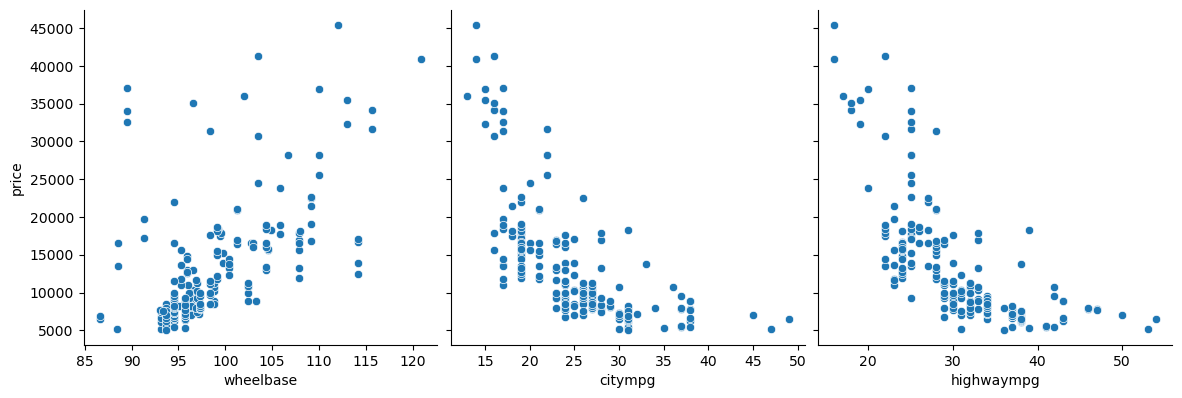

In [48]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

**Conclude:** 
+ **carwidth**, **carlength** and **curbweight** seem to be positively correlated with price. 
+ **carheight** does not show any significant trend with price.

In [49]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.8411182684818453

## Deriving new features

In [50]:
# Fuel economy 
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [51]:

cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


## Bivariate Analysis

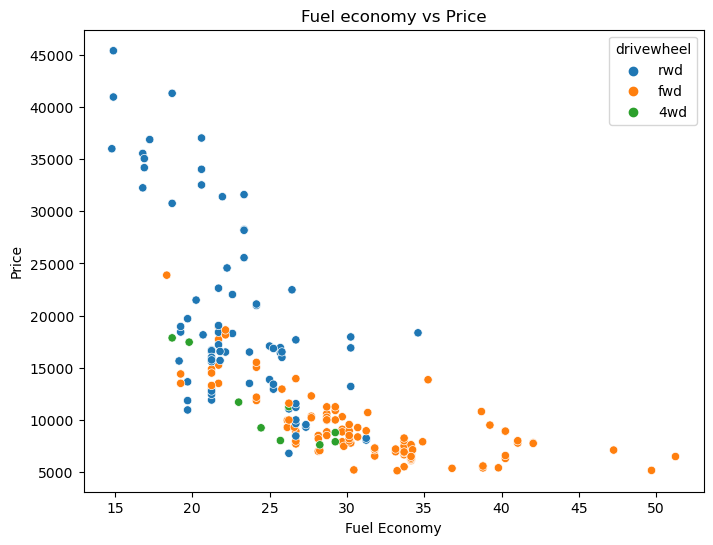

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

<Figure size 2500x600 with 0 Axes>

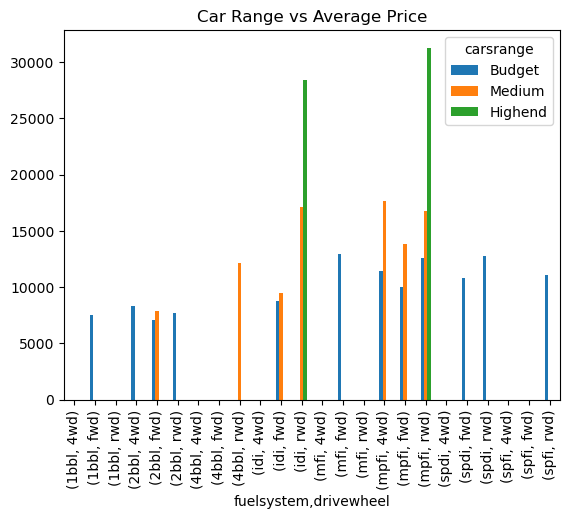

In [53]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

**Comment:** 
+ High ranged cars like **rwd drivewheel** with **idi** or **mpfi fuelsystem**.

**Based on the above analysis, we select important variables for analysis including:**
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [54]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


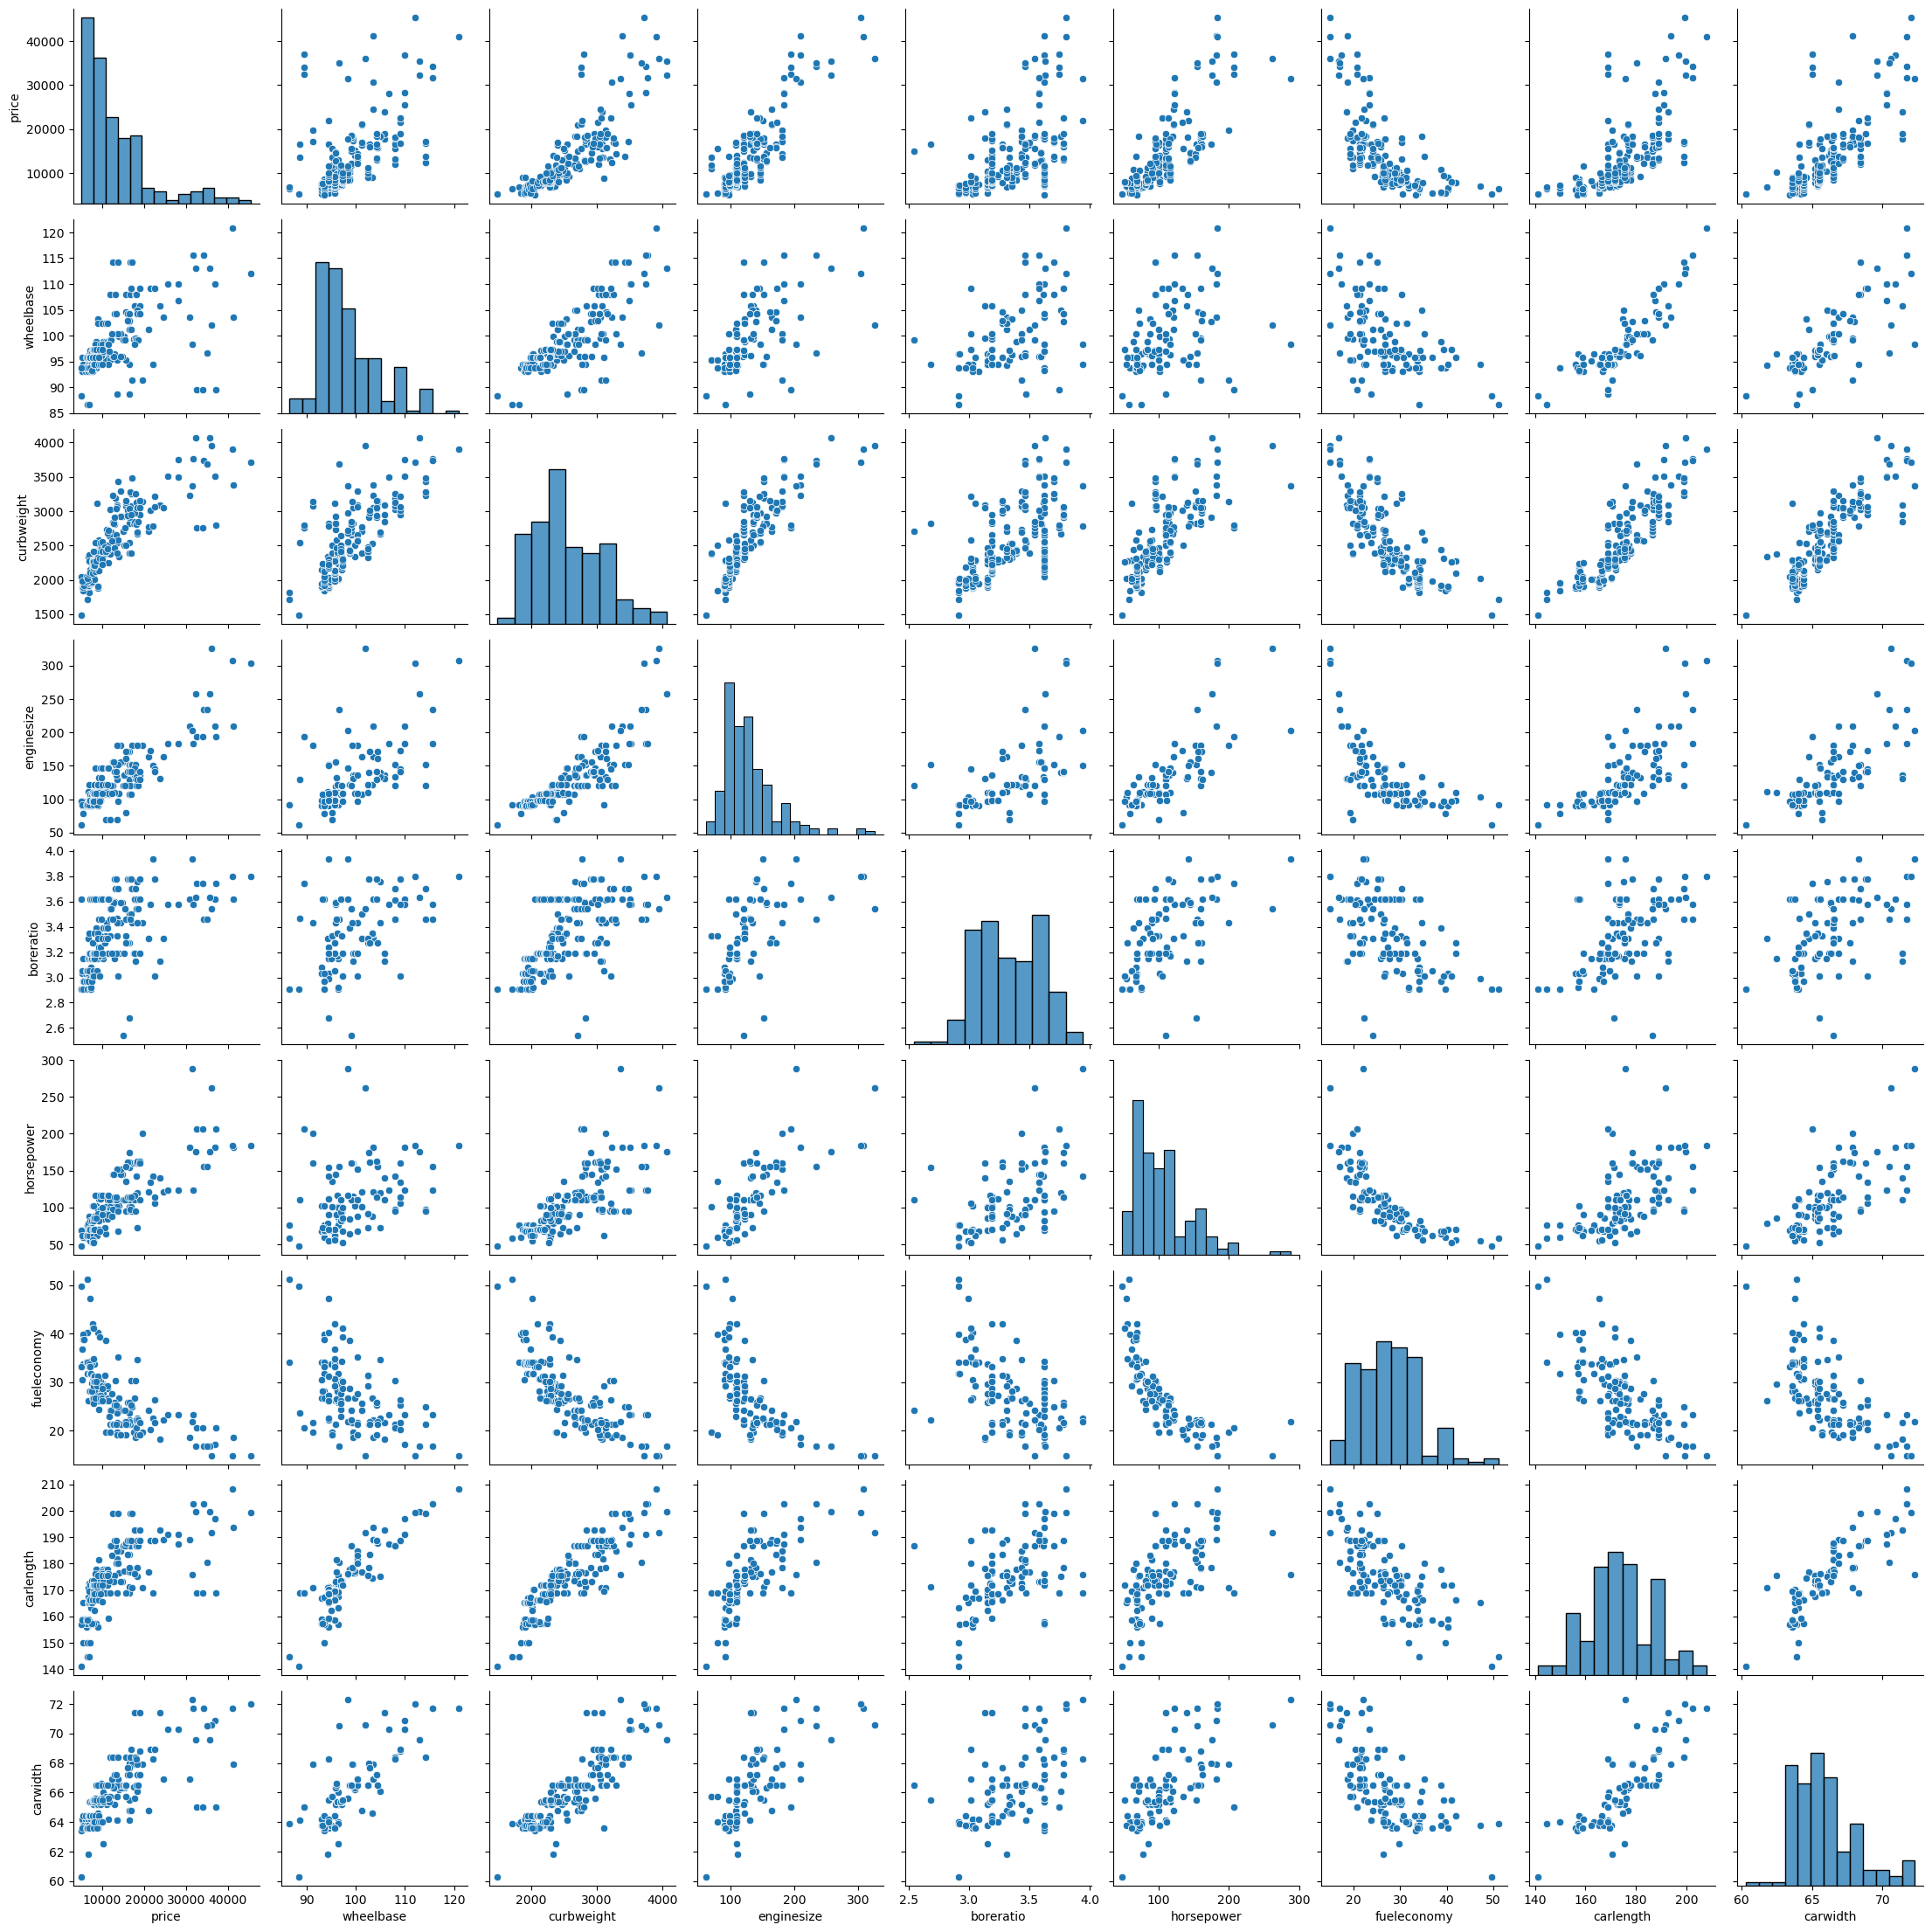

In [55]:
sns.pairplot(cars_lr)
plt.show()

## Dummy Variables

In [56]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [57]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [58]:
cars_lr.shape

(205, 31)

##  Model Building

## Case 1:

In [59]:
cars_lr.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Medium', 'Highend'],
      dtype='object')

In [60]:
X = cars_lr[['wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Medium', 'Highend'
       ]]
y = cars_lr['price']

### Train-Test Split and feature scaling

In [61]:

from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

In [63]:
# Load module,
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression ()
model.fit (X_train, y_train)


y_pred = model.predict (X_test)

In [65]:
intercept = model.intercept_
slope = model.coef_
print (intercept, slope)

-37697.86952253228 [ 6.95023570e+01  5.54275706e+00  7.45538014e+00 -3.04964154e+03
  5.56074169e+01  6.21961171e+01 -3.74888393e+01  6.69698248e+02
  2.38731581e+02  5.11790404e+02  2.31403246e+03 -3.46403838e+03
 -2.96853740e+03 -4.01865570e+03 -3.16210842e+01  3.24312406e+02
 -1.07706208e+04 -1.84177752e+03  2.75363216e+02  1.88712947e+03
 -2.81964913e+03 -1.10666376e+03 -4.47924497e+03 -5.30719278e+03
 -5.18300741e+03 -4.54747351e-13 -5.84171611e+03 -1.10666376e+03
  1.45818969e+03  8.56314294e+03]


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def Static_score_model_reg (y, y_pred):
    r2 = r2_score (y, y_pred)
    mse = mean_squared_error (y, y_pred)
    mae = mean_absolute_error (y, y_pred)
    return r2, mse, mae

In [67]:
def Visualize_model_reg (y, y_pred):
    plt.figure (figsize=(12, 6))
# Scatter plot    
    plt.subplot (1, 2, 1)
    plt.scatter (y_pred, y)
    plt.xlabel ("Model Predictions")
    plt.ylabel ("True Value")
    
    plt.plot ([0, np.max(y) + 2*np.min(y)], [0, np.max(y) + 2*np.min(y)], '-', color = "r")
#  Displot   
    plt.subplot (1, 2, 2)
    sns.distplot (y, hist = False, color = "r", label = "True Value")
    sns.distplot (y_pred, hist = False, color = "b", label = "Model Predictions", axlabel="Distribution")
    plt.legend()
    plt.show()

In [68]:
r2, mse, mae = Static_score_model_reg (y_train, model.predict (X_train))
print ('Train score: ', r2)
print ('Train MSE: ', mse)
print ('Train MAE: ', mae)

Train score:  0.9640058242422983
Train MSE:  2193827.834840366
Train MAE:  1109.9418463127586


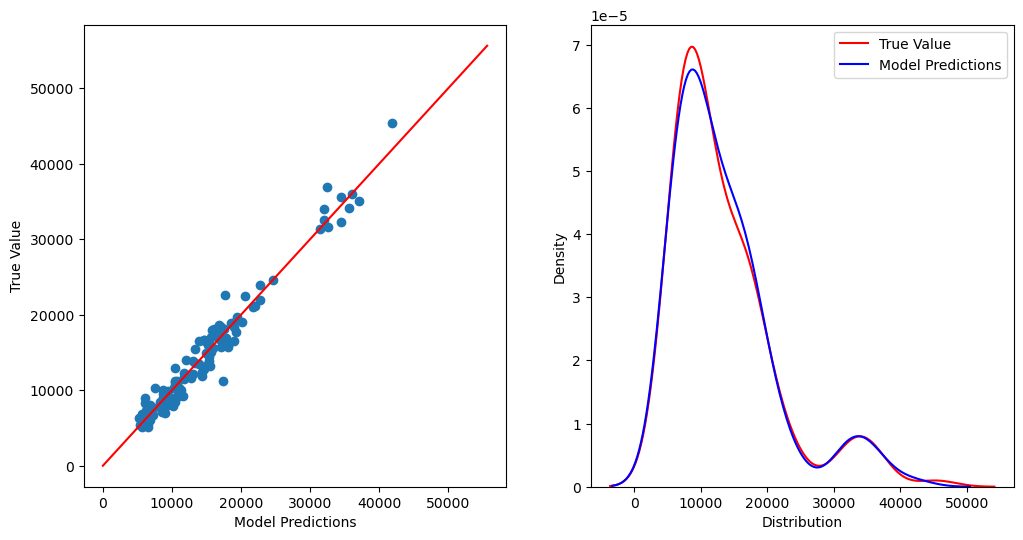

In [69]:
Visualize_model_reg (y_train, model.predict (X_train))

In [70]:
r2, mse, mae = Static_score_model_reg (y_test, y_pred)
print ('Test score: ', r2)
print ('Test MSE: ', mse)
print ('Test MAE: ', mae)

Test score:  0.8600674024664954
Test MSE:  9695148.539475972
Test MAE:  2150.576031550164


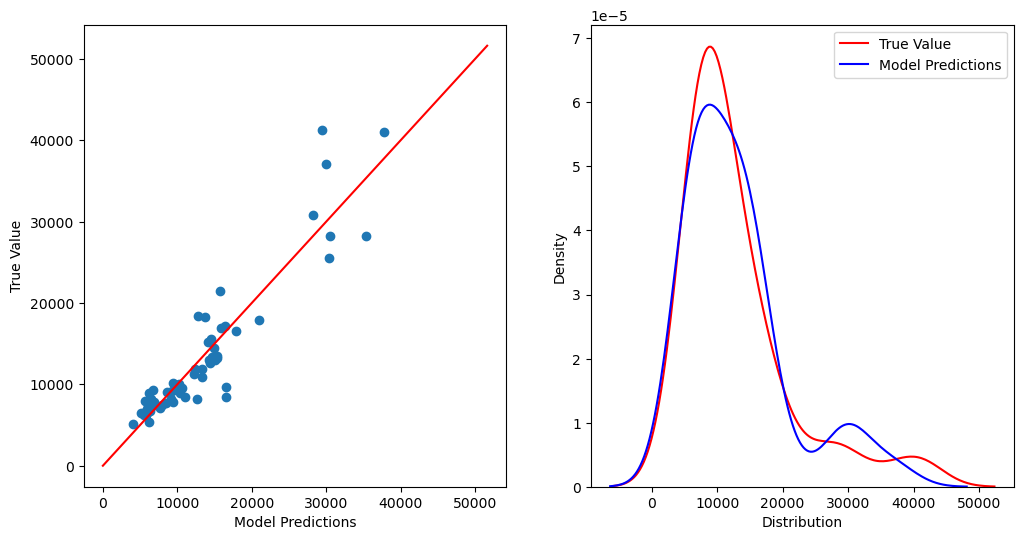

In [71]:
Visualize_model_reg (y_test, model.predict (X_test))

**Nhận xét:**
+ Dựa trên kết quả ở tập train và tập test, ta thấy model bị **overfitting**.
+ Do đó, model vẫn chưa tối ưu, cần tìm cách khắc phục.

**Cách khắc phục đề xuất đó là lựa chọn lại feature phù hợp với model.**

## Lựa chọn biến phù hợp

**Sử dụng Selection KBest**

(Cách khác là dùng ma trận tương quan)

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # dành cho regresion: f_regression

In [73]:
# Apply SelectKBest class to extract all best features

selectfeatures = SelectKBest (score_func = f_regression, k = 'all') 
# Note: Bài toán tuyến tính dùng function -> scrore_func = f_regression

fit = selectfeatures.fit (X, y)

In [74]:
scores = pd.DataFrame (fit.scores_)
columns = pd.DataFrame (X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat ([columns, scores], axis = 1)
featureScores.columns = ['Feature', 'Score']

# Sắp xếp lại từ lớn đến nhỏ
featureScores.sort_values ("Score", ascending = False, inplace = True)
featureScores

,Feature,Score
2,enginesize,657.642592
1,curbweight,468.596501
4,horsepower,382.161493
29,Highend,361.299421
7,carwidth,276.423594
23,four,192.612130
5,fueleconomy,190.955477
6,carlength,177.421429
15,rwd,140.059546
14,fwd,115.353719


In [75]:
cars_lr_1 = cars_lr[['price', 'enginesize', 'curbweight', 
                   'horsepower', 'Highend', 'carwidth', 
                   ]]

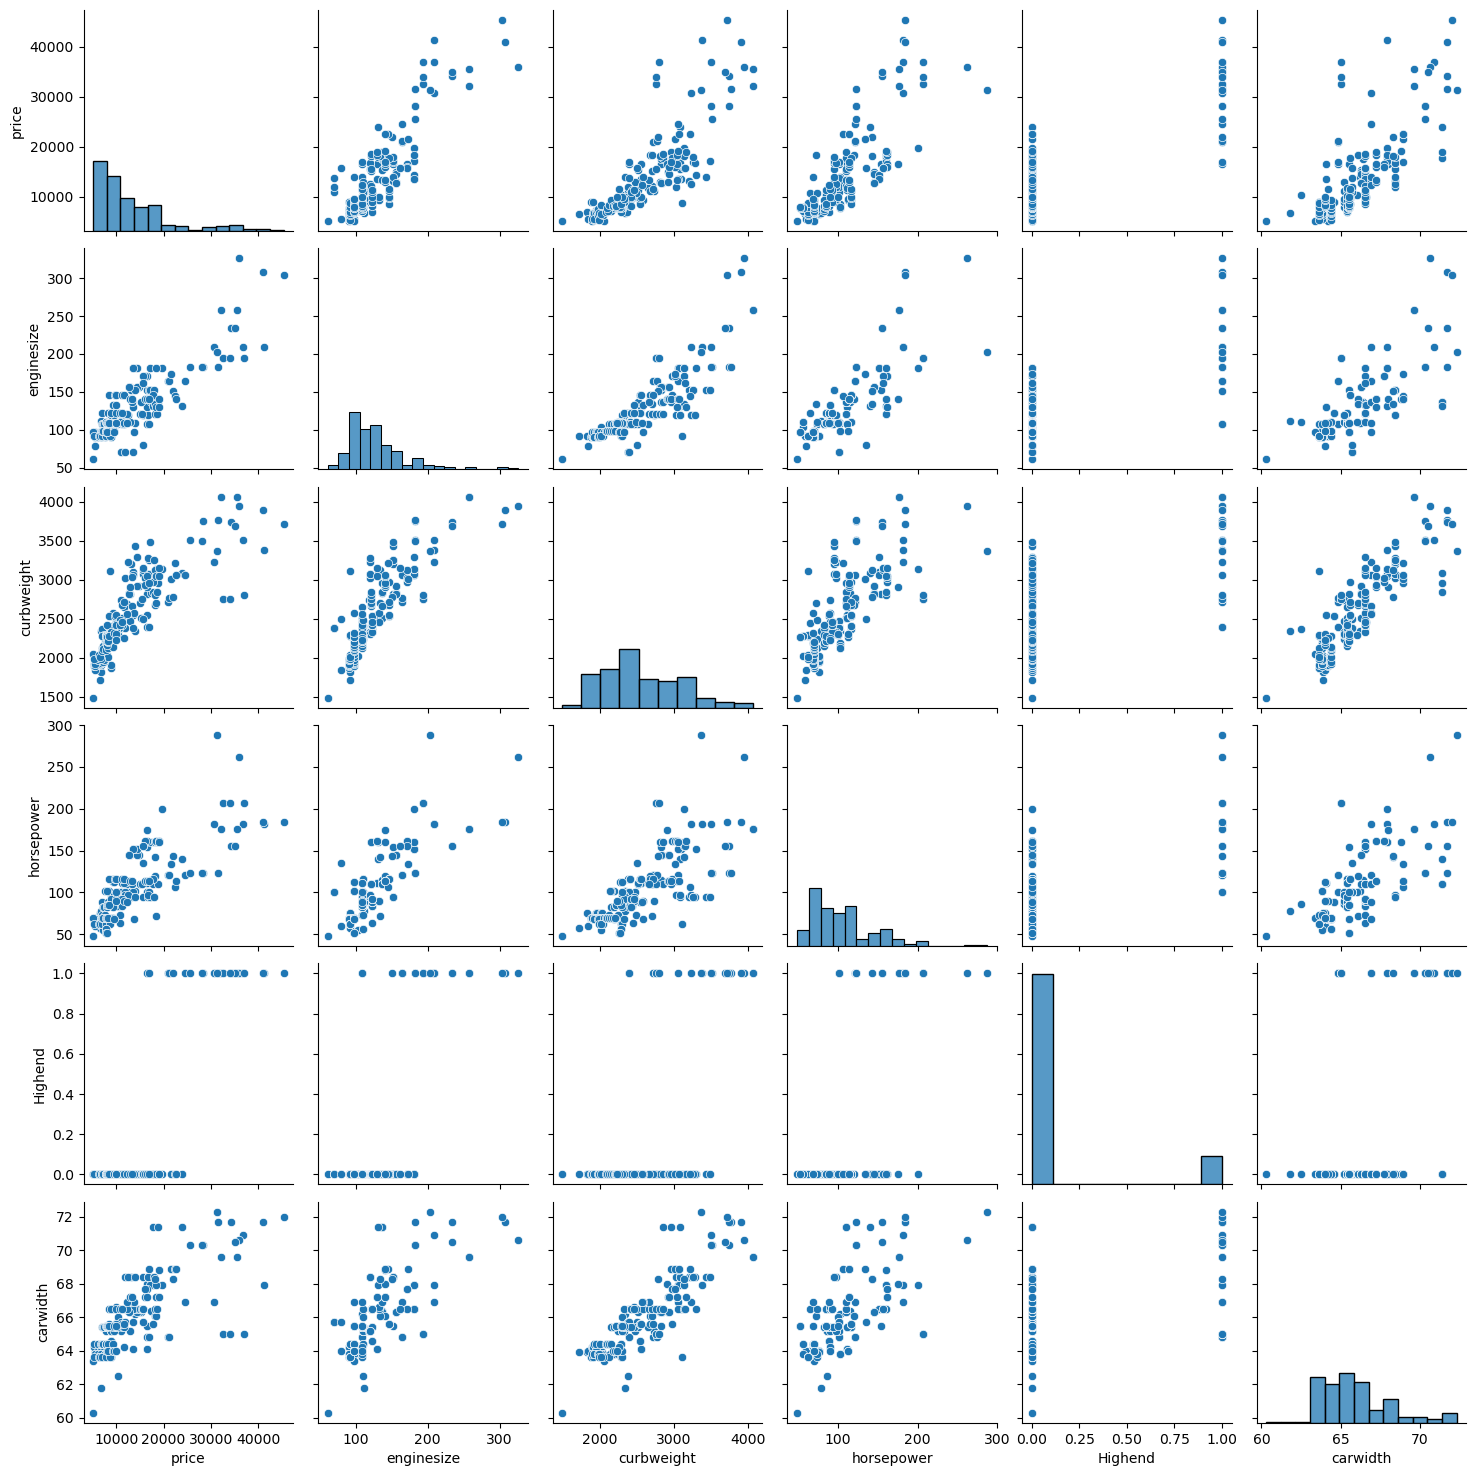

In [76]:
sns.pairplot(cars_lr_1)
plt.show()

In [77]:
X2 = cars_lr[['enginesize', 'curbweight', 'horsepower', 'Highend','carwidth']]
y2 = cars_lr['price']

In [78]:
X_train, X_test, y_train, y_test = train_test_split (X2, y2, test_size = 0.3, random_state = 42)

In [79]:
model = LinearRegression ()
model.fit (X_train, y_train)

# Để dự báo, dùng model.predict
y_pred = model.predict (X_test)

In [80]:
r2, mse, mae = Static_score_model_reg (y_train, model.predict (X_train))
print ('Train score: ', r2)
print ('Train MSE: ', mse)
print ('Train MAE: ', mae)

Train score:  0.917688946562532
Train MSE:  5016819.425501419
Train MAE:  1599.1469321734435


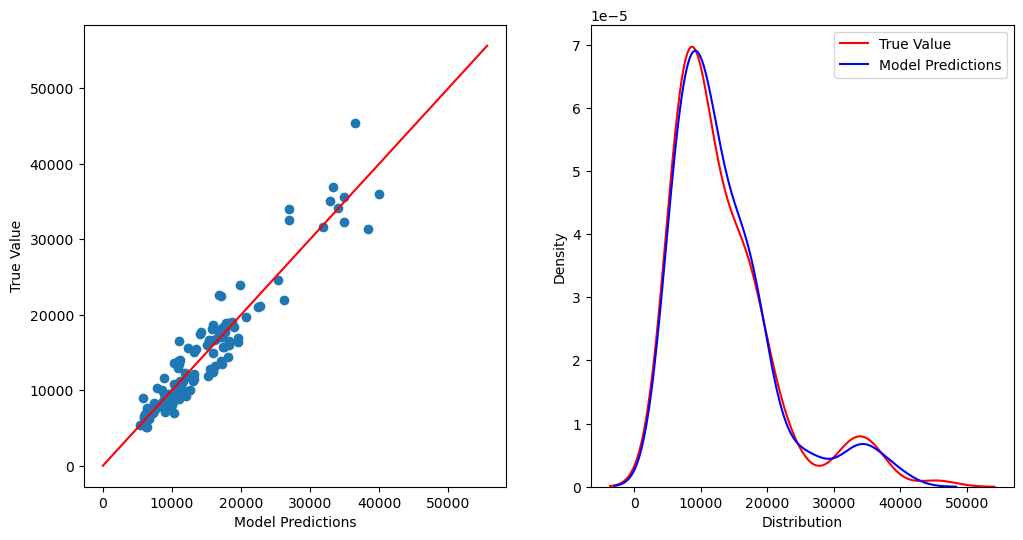

In [81]:
Visualize_model_reg (y_train, model.predict (X_train))

In [82]:
r2, mse, mae = Static_score_model_reg (y_test, y_pred)
print ('Test score: ', r2)
print ('Test MSE: ', mse)
print ('Test MAE: ', mae)

Test score:  0.884624454713036
Test MSE:  7993727.473774124
Test MAE:  1911.6732875159246


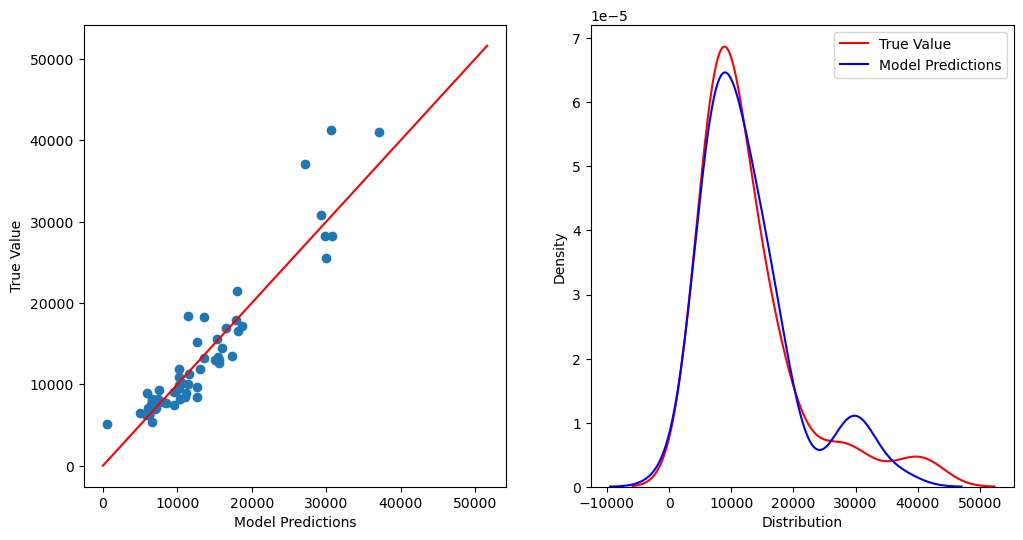

In [83]:
Visualize_model_reg (y_test, model.predict (X_test))

## Case 2:
### Train-Test Split and feature scaling

In [84]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 42)

In [85]:
df_train

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
177,11248,102.4,2458,122,3.31,92,29.25,175.6,66.5,1,...,0,0,0,1,0,0,0,0,0,0
75,16503,102.7,2910,140,3.78,175,21.25,178.4,68.0,1,...,0,0,0,1,0,0,0,0,1,0
174,10698,102.4,2480,110,3.27,73,31.35,175.6,66.5,0,...,0,0,0,1,0,0,0,0,0,0
31,6855,86.6,1819,92,2.91,76,34.15,144.6,63.9,1,...,0,0,0,1,0,0,0,0,0,0
12,20970,101.2,2710,164,3.31,121,24.15,176.8,64.8,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,18399,99.2,3139,181,3.43,160,21.70,178.5,67.9,1,...,1,0,0,0,1,0,0,0,1,0
14,24565,103.5,3055,164,3.31,121,22.25,189.0,66.9,1,...,0,0,0,0,1,0,0,0,0,1
92,6849,94.5,1938,97,3.15,69,33.70,165.3,63.8,1,...,0,0,0,1,0,0,0,0,1,0
179,15998,102.9,3016,171,3.27,161,21.25,183.5,67.7,1,...,0,0,0,0,1,0,0,0,0,0


In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [87]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
177,0.152177,0.544828,0.284379,0.203125,0.550000,0.169492,0.530275,0.534483,0.447619,1,...,0,0,0,1,0,0,0,0,0,0
75,0.282632,0.555172,0.485536,0.273438,0.885714,0.521186,0.236697,0.582759,0.590476,1,...,0,0,0,1,0,0,0,0,1,0
174,0.138523,0.544828,0.294170,0.156250,0.521429,0.088983,0.607339,0.534483,0.447619,0,...,0,0,0,1,0,0,0,0,0,0
31,0.043121,0.000000,0.000000,0.085938,0.264286,0.101695,0.710092,0.000000,0.200000,1,...,0,0,0,1,0,0,0,0,0,0
12,0.393526,0.503448,0.396529,0.367188,0.550000,0.292373,0.343119,0.555172,0.285714,1,...,0,0,0,0,1,0,0,0,0,1


In [88]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,0.205811,0.425175,0.335664,0.222711,0.557542,0.227539,0.458523,0.518194,0.398934,0.916084,...,0.062937,0.013986,0.034965,0.797203,0.118881,0.0,0.006993,0.013986,0.433566,0.118881
std,0.194490,0.209439,0.232474,0.161861,0.194528,0.170949,0.220142,0.213919,0.207804,0.278236,...,0.243703,0.117845,0.184337,0.403496,0.324786,0.0,0.083624,0.117845,0.497309,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.068976,0.272414,0.165332,0.109375,0.435714,0.095339,0.269725,0.382759,0.228571,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.140931,0.365517,0.277704,0.195312,0.550000,0.182203,0.436697,0.496552,0.352381,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.284358,0.537931,0.504673,0.277344,0.714286,0.271186,0.615596,0.689655,0.485714,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


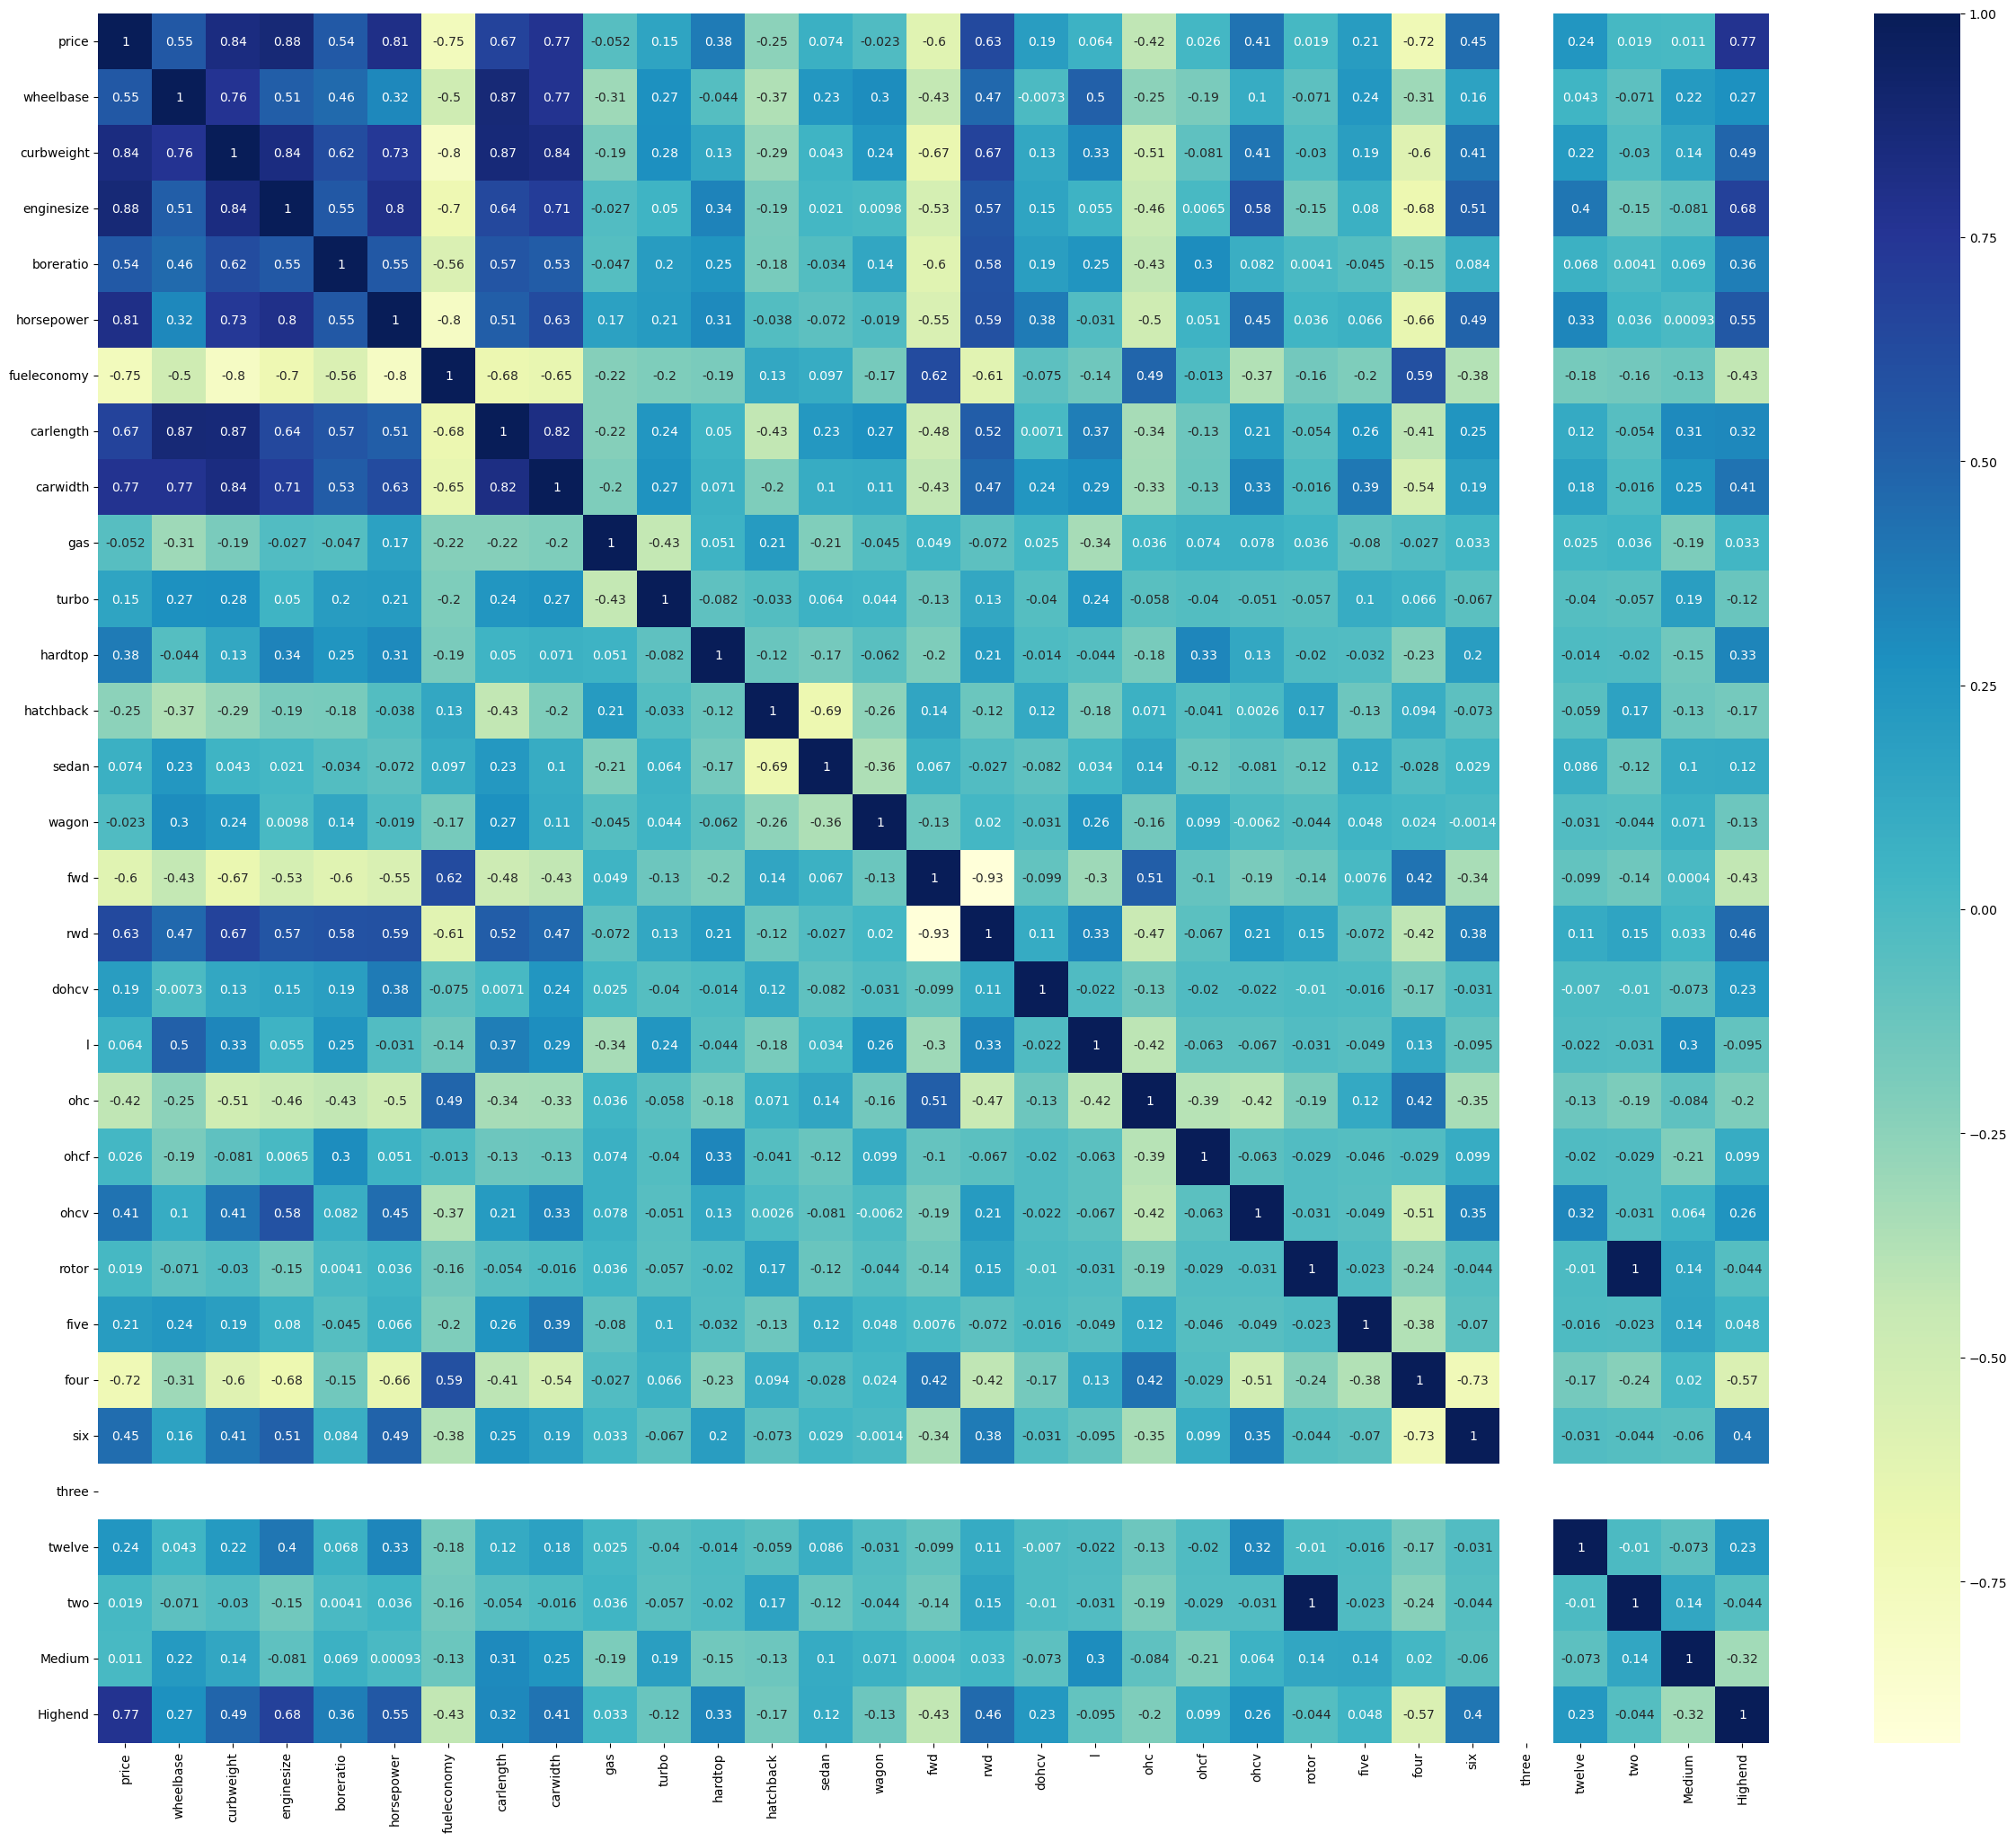

In [89]:
# Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [90]:

y_train = df_train.pop('price')
X_train = df_train

### RFE
Recursive feature elimination

In [91]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=10) # Số lượng biến chọn = 10 (n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [93]:
# RFE function will now determine the ranking of all the variables and rank them for our use.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 9),
 ('curbweight', True, 1),
 ('enginesize', False, 15),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('fueleconomy', False, 5),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 19),
 ('turbo', False, 16),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 20),
 ('rwd', False, 17),
 ('dohcv', True, 1),
 ('l', False, 8),
 ('ohc', False, 18),
 ('ohcf', False, 10),
 ('ohcv', False, 7),
 ('rotor', False, 14),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 3),
 ('three', False, 21),
 ('twelve', True, 1),
 ('two', False, 12),
 ('Medium', False, 13),
 ('Highend', True, 1)]

In [94]:
# Here we are taking the top 10 columns which are recommended by the RFE function
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'boreratio', 'horsepower', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [95]:

X_train.columns[~rfe.support_]

Index(['wheelbase', 'enginesize', 'fueleconomy', 'carlength', 'gas', 'turbo',
       'hardtop', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five',
       'four', 'six', 'three', 'two', 'Medium'],
      dtype='object')

### Mixed Approach:
Now that we have the top 10 variables that have the greatest influence on car prices, we will now continue with a mixed approach.

In [96]:

X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

In [97]:
import statsmodels.api as sm

In [98]:
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,curbweight,boreratio,horsepower,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
177,1.0,0.284379,0.550000,0.169492,0.447619,1,0,0,0,0,0
75,1.0,0.485536,0.885714,0.521186,0.590476,1,0,0,0,0,0
174,1.0,0.294170,0.521429,0.088983,0.447619,0,1,0,0,0,0
31,1.0,0.000000,0.264286,0.101695,0.200000,1,0,0,0,0,0
12,1.0,0.396529,0.550000,0.292373,0.285714,0,1,0,0,0,1


In [99]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [100]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1

In [101]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     258.7
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.45e-81
Time:                        19:49:50   Log-Likelihood:                 248.05
No. Observations:                 143   AIC:                            -474.1
Df Residuals:                     132   BIC:                            -441.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0873      0.022      4.000      0.0

In [102]:
checkVIF(X_train_new)

,Features,VIF
0,const,34.45
1,curbweight,6.77
6,sedan,5.36
5,hatchback,5.05
4,carwidth,3.89
3,horsepower,3.70
7,wagon,3.20
2,boreratio,1.78
10,Highend,1.64
8,dohcv,1.43


In [103]:
X_train_new = X_train_new.drop(["curbweight","sedan", "hatchback"], axis = 1)
X_train_new

,const,boreratio,horsepower,carwidth,wagon,dohcv,twelve,Highend
177,1.0,0.550000,0.169492,0.447619,0,0,0,0
75,1.0,0.885714,0.521186,0.590476,0,0,0,0
174,1.0,0.521429,0.088983,0.447619,0,0,0,0
31,1.0,0.264286,0.101695,0.200000,0,0,0,0
12,1.0,0.550000,0.292373,0.285714,0,0,0,1
...,...,...,...,...,...,...,...,...
106,1.0,0.635714,0.457627,0.580952,0,0,0,0
14,1.0,0.550000,0.292373,0.485714,0,0,0,1
92,1.0,0.435714,0.072034,0.190476,0,0,0,0
179,1.0,0.521429,0.461864,0.561905,0,0,0,0


### MODEL 2

In [104]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     224.2
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           4.58e-71
Time:                        19:49:50   Log-Likelihood:                 213.03
No. Observations:                 143   AIC:                            -410.1
Df Residuals:                     135   BIC:                            -386.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0650      0.015     -4.252      0.0

In [105]:
X_train_new = X_train_new.drop(["boreratio", "wagon"], axis = 1)
X_train_new

,const,horsepower,carwidth,dohcv,twelve,Highend
177,1.0,0.169492,0.447619,0,0,0
75,1.0,0.521186,0.590476,0,0,0
174,1.0,0.088983,0.447619,0,0,0
31,1.0,0.101695,0.200000,0,0,0
12,1.0,0.292373,0.285714,0,0,1
...,...,...,...,...,...,...
106,1.0,0.457627,0.580952,0,0,0
14,1.0,0.292373,0.485714,0,0,1
92,1.0,0.072034,0.190476,0,0,0
179,1.0,0.461864,0.561905,0,0,0


### MODEL 3

In [106]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     317.6
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.72e-73
Time:                        19:49:51   Log-Likelihood:                 212.84
No. Observations:                 143   AIC:                            -413.7
Df Residuals:                     137   BIC:                            -395.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0709      0.011     -6.521      0.0

In [107]:
checkVIF(X_train_new)

,Features,VIF
0,const,5.42
1,horsepower,2.29
2,carwidth,1.66
5,Highend,1.46
3,dohcv,1.20
4,twelve,1.15


**Comment:** 
+ The `p-value` values ​​of the variables in the model are all < 0.05 -> Satisfy the condition of `p-value`. 
+ The value of `VIF` is also < 5 and therefore the condition of `VIF` is satisfied 
+ The value **R-Squared** of the set **Training** = **92.1%** **Result The model on the training set is suitable.**

## Residual Analysis of Model

Now to check if the **error terms** are normally distributed (which is one of the main assumptions of linear regression), let's plot the error terms and see what it looks like. how.

In [108]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

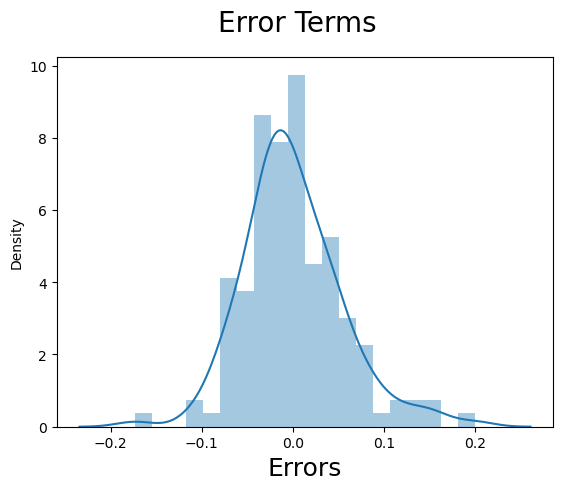

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18);   

## Prediction and Evaluation

In [110]:

num_vars = ['horsepower', 'carwidth', 'Highend', 'dohcv', 'twelve','price']

# Applying the transform() function on the test set
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

# checking the df shape
df_test.shape

(62, 31)

In [111]:
# Checking more info about test df
df_test.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,62.000000,62.000000,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000
mean,0.216285,98.356452,2514.806452,126.66129,3.350968,0.329986,28.663710,172.651613,0.475523,0.870968,...,0.064516,0.032258,0.096774,0.725806,0.112903,0.016129,0.0,0.032258,0.387097,0.112903
std,0.232045,5.929576,518.683669,42.45381,0.268351,0.237102,7.921811,12.158351,0.180975,0.337972,...,0.247676,0.178127,0.298064,0.449749,0.319058,0.127000,0.0,0.178127,0.491062,0.319058
min,0.000000,86.600000,1488.000000,61.00000,2.910000,0.000000,14.900000,141.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.072648,94.500000,2125.000000,97.00000,3.150000,0.132075,21.725000,166.300000,0.307018,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.122857,96.750000,2395.000000,115.00000,3.330000,0.289308,28.200000,172.200000,0.451754,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.273995,101.900000,2892.250000,146.00000,3.615000,0.446541,33.700000,178.100000,0.543860,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
max,1.000000,120.900000,3900.000000,308.00000,3.800000,1.000000,51.250000,208.100000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [112]:
# Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [113]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const', axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [114]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [115]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.796234652742501

In [116]:

r2, mse, mae = Static_score_model_reg (y_test, y_pred)
print ('Test score: ', r2)
print ('Test MSE: ', mse)
print ('Test MAE: ', mae)

Test score:  0.796234652742501
Test MSE:  0.010794759704331372
Test MAE:  0.08606897377836523


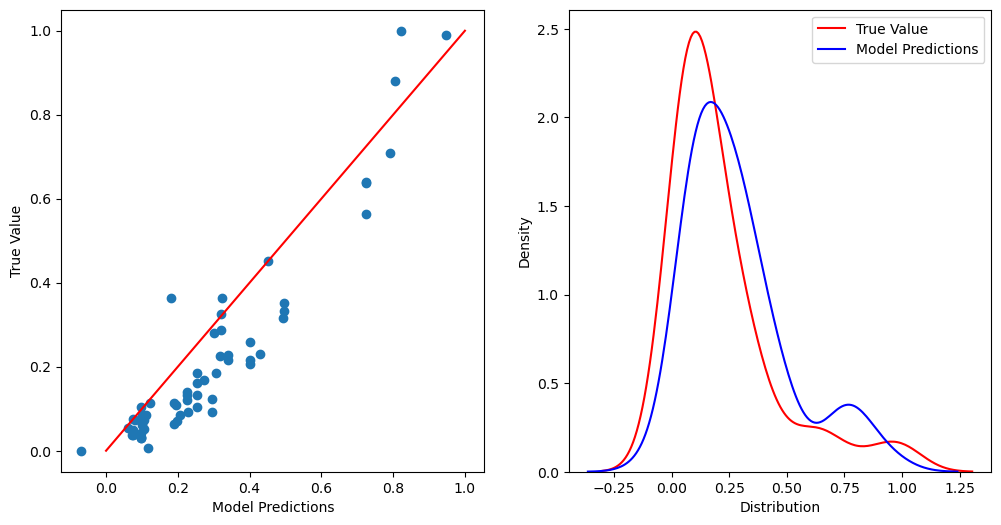

In [117]:
Visualize_model_reg (y_test, lm.predict (X_test_new))

### EVALUATION OF THE MODEL

Text(0, 0.5, 'y_pred')

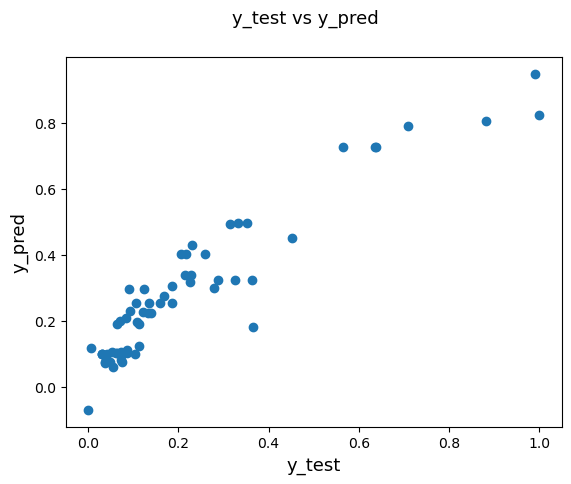

In [118]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=13) # Plot heading 
plt.xlabel('y_test', fontsize=13)             # X-label
plt.ylabel('y_pred', fontsize=13)

### Evaluation of the model using Statistics

In [119]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     317.6
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.72e-73
Time:                        19:49:52   Log-Likelihood:                 212.84
No. Observations:                 143   AIC:                            -413.7
Df Residuals:                     137   BIC:                            -395.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0709      0.011     -6.521      0.0

**Comment:** 
+ For test data and train data, the R-squared values ​​are 0.79 and 0.921, respectively. 
+ The p-value for all variables is less than 0.05 and statistically significant. 
**Conclusion for method 2:** 
+ Method 2 gives worse results when the model is **overfitting.** 
+ If the requirements are not high, the model is temporarily acceptable. 
The variables used include: 
+ horsepower 
+ carwidth 
+ dohcv 
+ twelve 
+ HighEnd 
**Future orientation** 
+ To overcome and improve the accuracy of the model more, it is possible to study using more difficult algorithms.

## Conclusions
+ Score train = **91.77%**, and score test = **88.46%**. 
+ Therefore, if there is no high requirement, the construction model is suitable for Car Price prediction. 
+ Variables that greatly affect Car Price include:
    + `enginesize`
    + `curbweight`
    + `horsepower`
    + `Highend`
    + `carwidth`